## Predicting Personal Achievement based on Lifestyle Factors

#### ```Project Summary:```

Predict levels of Work-Life Balance based on lifestyle factors, using a dataset of 12,757 survey responses to 23 lifestyle attributes. The actual survey was given by given Authenic-Happiness.come and is linked here: http://www.authentic-happiness.com/your-life-satisfaction-score

Dataset: https://www.kaggle.com/ydalat/lifestyle-and-wellbeing-data

#### ```Initial Thoughts:```
- expect high correlation with sleep, stress, negative emotions, meditation
- curious about bmi and achievement
- does high stress = high achievement / can less stress still = high achievement?
- how does female achievement compare to male
- expect higher age to contribute to higher achievement
- possibly drop flow, lost vacation, places visited, fruit_veggies, todo_completed, sufficient income

#### ```Project Goals:```
- Create a model that will identify drivers of high personal achievement based on lifestyle factors. 
- Create a single notebook with necessary helper functions and instructions that allow a user to reproduce results on their own. 

Trello board:  https://trello.com/b/ebZrkO2D/lifestyle-factors-that-affect-personal-achievement

<a id='back'></a>
### Quick Links to Sections within this Notebook

- [Acquire Data](#AD)
- [Prepare Data](#PD)
- [Explore Data](#EX)
- [Split Data](#SD)
- [Hypothesis Testing](#HY)
- [Cluster Data](#CL)
- [Hypothesis Testing on Clusters](#HC)
- [Scale Data](#Scale)
- [Modeling](#Model)
- [Model on Test Data](#TD)
- [Conclusion](#Concl)

In [1]:


# # Wrangling
# import pandas as pd
# import numpy as np
# import wrangle
# from acquire import get_zillow_data
# # Statistical Tests
# import scipy.stats as stats

# # Visualizing
# import matplotlib.pyplot as plt
# from matplotlib import cm
# import seaborn as sns

# #Modeling Imports
# from sklearn.model_selection import learning_curve
# from sklearn.cluster import KMeans, dbscan
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.feature_selection import SelectKBest, RFE, f_regression 
# from sklearn.linear_model import LinearRegression, LassoLars
# from sklearn.preprocessing import PolynomialFeatures

# # modeling methods
# from sklearn.metrics import mean_squared_error, explained_variance_score
# from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
# from sklearn.preprocessing import PolynomialFeatures

# pd.set_option('display.max_columns', 80)

<a id='AD'></a>
## ```Acquire & Prepare Data```
[back](#back) /  [next](#PD)

In [2]:
import pandas as pd
import acquire, prepare, explore, model, OLDexplore
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Statistical Tests
import scipy.stats as stats
from scipy.stats import pearsonr

# #Modeling Imports
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.cluster import KMeans, dbscan
from sklearn.feature_selection import SelectKBest, RFE, f_regression 
from sklearn.linear_model import LogisticRegression, LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.tree import export_graphviz, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = acquire.get_wellbeing_data()
df.head(1)

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/15,3,2,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,Female,609.5


In [4]:
#How many nulls in each column?
df.isnull().sum(axis =0).sum()

0

In [5]:
#How many nulls in each row?
df.isnull().sum(axis =1).sum()



0

In [6]:
df.columns

Index(['Timestamp', 'FRUITS_VEGGIES', 'DAILY_STRESS', 'PLACES_VISITED',
       'CORE_CIRCLE', 'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'ACHIEVEMENT',
       'DONATION', 'BMI_RANGE', 'TODO_COMPLETED', 'FLOW', 'DAILY_STEPS',
       'LIVE_VISION', 'SLEEP_HOURS', 'LOST_VACATION', 'DAILY_SHOUTING',
       'SUFFICIENT_INCOME', 'PERSONAL_AWARDS', 'TIME_FOR_PASSION',
       'WEEKLY_MEDITATION', 'AGE', 'GENDER', 'WORK_LIFE_BALANCE_SCORE'],
      dtype='object')

In [7]:
# New dataframe 
df.groupby('PERSONAL_AWARDS')['SLEEP_HOURS'].value_counts()

PERSONAL_AWARDS  SLEEP_HOURS
0                7              147
                 8              128
                 6              117
                 5               55
                 9               45
                               ... 
10               4               64
                 10              61
                 2                5
                 3                2
                 1                1
Name: SLEEP_HOURS, Length: 103, dtype: int64

In [8]:
df.ACHIEVEMENT.value_counts()

2     2606
3     2538
5     2031
4     1838
1     1595
0     1302
10    1170
6     1145
7      814
8      693
9      240
Name: ACHIEVEMENT, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15972 entries, 0 to 15971
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Timestamp                15972 non-null  object 
 1   FRUITS_VEGGIES           15972 non-null  int64  
 2   DAILY_STRESS             15972 non-null  object 
 3   PLACES_VISITED           15972 non-null  int64  
 4   CORE_CIRCLE              15972 non-null  int64  
 5   SUPPORTING_OTHERS        15972 non-null  int64  
 6   SOCIAL_NETWORK           15972 non-null  int64  
 7   ACHIEVEMENT              15972 non-null  int64  
 8   DONATION                 15972 non-null  int64  
 9   BMI_RANGE                15972 non-null  int64  
 10  TODO_COMPLETED           15972 non-null  int64  
 11  FLOW                     15972 non-null  int64  
 12  DAILY_STEPS              15972 non-null  int64  
 13  LIVE_VISION              15972 non-null  int64  
 14  SLEEP_HOURS           

<a id='PD'></a>
## ```Prepare Data```

[back](#back) |  [next](#EX)

In [10]:
df = prepare.prep_wellbeing(df)

In [11]:
df.stress.value_counts()

3    4398
2    3407
4    2960
1    2478
5    2052
0     676
Name: stress, dtype: int64

In [12]:
df.head()

,fruit_veg,stress,core_circle,support,social,achievement,donation,bmi,steps,vision,sleep_hrs,shouts,awards,passion,meditation,age_range,gender,balance
0,3,2,5,0,5,2,0,1,5,0,7,5,4,0,5,36 to 50,Female,609.5
1,2,3,3,8,10,5,2,2,5,5,8,2,3,2,6,36 to 50,Female,655.6
2,2,3,4,4,10,3,2,2,4,5,8,2,4,8,3,36 to 50,Female,631.6
3,3,3,3,10,7,2,5,2,5,0,5,5,5,2,0,51 or more,Female,622.7
4,5,1,3,10,4,2,4,2,5,0,7,0,8,1,5,51 or more,Female,663.9


In [13]:
df.columns

Index(['fruit_veg', 'stress', 'core_circle', 'support', 'social',
       'achievement', 'donation', 'bmi', 'steps', 'vision', 'sleep_hrs',
       'shouts', 'awards', 'passion', 'meditation', 'age_range', 'gender',
       'balance'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15971 entries, 0 to 15971
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fruit_veg    15971 non-null  int64  
 1   stress       15971 non-null  int64  
 2   core_circle  15971 non-null  int64  
 3   support      15971 non-null  int64  
 4   social       15971 non-null  int64  
 5   achievement  15971 non-null  int64  
 6   donation     15971 non-null  int64  
 7   bmi          15971 non-null  int64  
 8   steps        15971 non-null  int64  
 9   vision       15971 non-null  int64  
 10  sleep_hrs    15971 non-null  int64  
 11  shouts       15971 non-null  int64  
 12  awards       15971 non-null  int64  
 13  passion      15971 non-null  int64  
 14  meditation   15971 non-null  int64  
 15  age_range    15971 non-null  object 
 16  gender       15971 non-null  object 
 17  balance      15971 non-null  float64
dtypes: float64(1), int64(15), object(2)
memory usa

In [15]:
df.support.value_counts()


10    3993
5     1915
3     1835
4     1646
2     1576
6     1119
7     1053
8      917
1      883
0      740
9      294
Name: support, dtype: int64

In [16]:
#Bin achievement levels
cut_labels_3 = ['low_ach', 'avg_ach', 'high_ach']
cut_bins = [-1, 1, 7, 11]
df['ach_level'] = pd.cut(df['achievement'], bins=cut_bins, labels=cut_labels_3)

# make dummy columns for achievement levels
ach_dummies = pd.get_dummies(df.ach_level, drop_first=False)
ach_dummies.sample(5)

,low_ach,avg_ach,high_ach
6487,0,0,1
10448,0,1,0
1277,0,1,0
11881,0,1,0
2516,0,0,1


In [17]:
# make dummy columns for age range
age_dummies = pd.get_dummies(df.age_range, drop_first=False)
age_dummies.sample(5)

,21 to 35,36 to 50,51 or more,Less than 20
13610,0,0,1,0
7917,1,0,0,0
14435,1,0,0,0
15624,1,0,0,0
8117,0,1,0,0


In [18]:
df.sleep_hrs.value_counts()

7     5566
8     4324
6     3396
5     1025
9      987
10     333
4      252
3       49
2       21
1       18
Name: sleep_hrs, dtype: int64

In [19]:
#Bin sleep3 = ['0-4', '5-7', '8+']
cut_labels_s = ['0-4', '5-8', '9+']
cut_bins = [-1, 5, 9, 10]
df['sleep_bins'] = pd.cut(df['sleep_hrs'], bins=cut_bins, labels=cut_labels_s)

In [20]:
df.sleep_bins

0        5-8
1        5-8
2        5-8
3        0-4
4        5-8
        ... 
15967    5-8
15968    5-8
15969    5-8
15970    5-8
15971    5-8
Name: sleep_bins, Length: 15971, dtype: category
Categories (3, object): ['0-4' < '5-8' < '9+']

In [21]:
df.sleep_bins.value_counts()

5-8    14273
0-4     1365
9+       333
Name: sleep_bins, dtype: int64

In [22]:
# make dummy columns for sleep levels
slp_dummies = pd.get_dummies(df.sleep_bins, drop_first=False)
slp_dummies.sample(5)

,0-4,5-8,9+
13312,0,1,0
2773,0,1,0
9017,0,1,0
6231,0,1,0
10971,0,1,0


In [23]:
# make dummy columns for achievement levels
ach_dummies = pd.get_dummies(df.ach_level, drop_first=False)
ach_dummies.sample(5)

,low_ach,avg_ach,high_ach
6454,1,0,0
4959,0,1,0
15152,0,0,1
7206,0,1,0
11807,0,1,0


In [24]:
# make dummy columns for gender
gen_dummies = pd.get_dummies(df.gender, drop_first = False)
gen_dummies.sample(5)

,Female,Male
3349,0,1
15106,1,0
7257,1,0
3029,1,0
12567,1,0


In [25]:
# Add encoded columns back onto original dataframe.

df2 = pd.concat([df, ach_dummies], axis=1)
df2

,fruit_veg,stress,core_circle,support,social,achievement,donation,bmi,steps,vision,...,passion,meditation,age_range,gender,balance,ach_level,sleep_bins,low_ach,avg_ach,high_ach
0,3,2,5,0,5,2,0,1,5,0,...,0,5,36 to 50,Female,609.5,avg_ach,5-8,0,1,0
1,2,3,3,8,10,5,2,2,5,5,...,2,6,36 to 50,Female,655.6,avg_ach,5-8,0,1,0
2,2,3,4,4,10,3,2,2,4,5,...,8,3,36 to 50,Female,631.6,avg_ach,5-8,0,1,0
3,3,3,3,10,7,2,5,2,5,0,...,2,0,51 or more,Female,622.7,avg_ach,0-4,0,1,0
4,5,1,3,10,4,2,4,2,5,0,...,1,5,51 or more,Female,663.9,avg_ach,5-8,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15967,3,3,4,0,10,0,4,2,10,7,...,2,5,51 or more,Female,644.5,low_ach,5-8,1,0,0
15968,3,3,8,7,4,6,3,1,6,5,...,5,8,21 to 35,Female,714.9,avg_ach,5-8,0,1,0
15969,4,3,10,10,8,6,5,1,5,2,...,1,10,21 to 35,Male,716.6,avg_ach,5-8,0,1,0
15970,1,1,8,2,7,3,2,1,1,5,...,6,8,21 to 35,Female,682.0,avg_ach,5-8,0,1,0


In [26]:
df3 = pd.concat([df2, gen_dummies], axis=1)
df3

,fruit_veg,stress,core_circle,support,social,achievement,donation,bmi,steps,vision,...,age_range,gender,balance,ach_level,sleep_bins,low_ach,avg_ach,high_ach,Female,Male
0,3,2,5,0,5,2,0,1,5,0,...,36 to 50,Female,609.5,avg_ach,5-8,0,1,0,1,0
1,2,3,3,8,10,5,2,2,5,5,...,36 to 50,Female,655.6,avg_ach,5-8,0,1,0,1,0
2,2,3,4,4,10,3,2,2,4,5,...,36 to 50,Female,631.6,avg_ach,5-8,0,1,0,1,0
3,3,3,3,10,7,2,5,2,5,0,...,51 or more,Female,622.7,avg_ach,0-4,0,1,0,1,0
4,5,1,3,10,4,2,4,2,5,0,...,51 or more,Female,663.9,avg_ach,5-8,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15967,3,3,4,0,10,0,4,2,10,7,...,51 or more,Female,644.5,low_ach,5-8,1,0,0,1,0
15968,3,3,8,7,4,6,3,1,6,5,...,21 to 35,Female,714.9,avg_ach,5-8,0,1,0,1,0
15969,4,3,10,10,8,6,5,1,5,2,...,21 to 35,Male,716.6,avg_ach,5-8,0,1,0,0,1
15970,1,1,8,2,7,3,2,1,1,5,...,21 to 35,Female,682.0,avg_ach,5-8,0,1,0,1,0


In [27]:
df3.rename(columns = {'Female':'female', 'Male':'male'}, inplace=True)

In [28]:
df3

,fruit_veg,stress,core_circle,support,social,achievement,donation,bmi,steps,vision,...,age_range,gender,balance,ach_level,sleep_bins,low_ach,avg_ach,high_ach,female,male
0,3,2,5,0,5,2,0,1,5,0,...,36 to 50,Female,609.5,avg_ach,5-8,0,1,0,1,0
1,2,3,3,8,10,5,2,2,5,5,...,36 to 50,Female,655.6,avg_ach,5-8,0,1,0,1,0
2,2,3,4,4,10,3,2,2,4,5,...,36 to 50,Female,631.6,avg_ach,5-8,0,1,0,1,0
3,3,3,3,10,7,2,5,2,5,0,...,51 or more,Female,622.7,avg_ach,0-4,0,1,0,1,0
4,5,1,3,10,4,2,4,2,5,0,...,51 or more,Female,663.9,avg_ach,5-8,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15967,3,3,4,0,10,0,4,2,10,7,...,51 or more,Female,644.5,low_ach,5-8,1,0,0,1,0
15968,3,3,8,7,4,6,3,1,6,5,...,21 to 35,Female,714.9,avg_ach,5-8,0,1,0,1,0
15969,4,3,10,10,8,6,5,1,5,2,...,21 to 35,Male,716.6,avg_ach,5-8,0,1,0,0,1
15970,1,1,8,2,7,3,2,1,1,5,...,21 to 35,Female,682.0,avg_ach,5-8,0,1,0,1,0


In [29]:
df4 = pd.concat([df3, age_dummies], axis=1)
df4

,fruit_veg,stress,core_circle,support,social,achievement,donation,bmi,steps,vision,...,sleep_bins,low_ach,avg_ach,high_ach,female,male,21 to 35,36 to 50,51 or more,Less than 20
0,3,2,5,0,5,2,0,1,5,0,...,5-8,0,1,0,1,0,0,1,0,0
1,2,3,3,8,10,5,2,2,5,5,...,5-8,0,1,0,1,0,0,1,0,0
2,2,3,4,4,10,3,2,2,4,5,...,5-8,0,1,0,1,0,0,1,0,0
3,3,3,3,10,7,2,5,2,5,0,...,0-4,0,1,0,1,0,0,0,1,0
4,5,1,3,10,4,2,4,2,5,0,...,5-8,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15967,3,3,4,0,10,0,4,2,10,7,...,5-8,1,0,0,1,0,0,0,1,0
15968,3,3,8,7,4,6,3,1,6,5,...,5-8,0,1,0,1,0,1,0,0,0
15969,4,3,10,10,8,6,5,1,5,2,...,5-8,0,1,0,0,1,1,0,0,0
15970,1,1,8,2,7,3,2,1,1,5,...,5-8,0,1,0,1,0,1,0,0,0


In [30]:
df3.female.value_counts()

1    9858
0    6113
Name: female, dtype: int64

In [31]:
df3.ach_level.value_counts()

avg_ach     10971
low_ach      2897
high_ach     2103
Name: ach_level, dtype: int64

In [32]:
df.columns

Index(['fruit_veg', 'stress', 'core_circle', 'support', 'social',
       'achievement', 'donation', 'bmi', 'steps', 'vision', 'sleep_hrs',
       'shouts', 'awards', 'passion', 'meditation', 'age_range', 'gender',
       'balance', 'ach_level', 'sleep_bins'],
      dtype='object')

In [33]:
df.drop(columns = ['achievement'])
df.columns

Index(['fruit_veg', 'stress', 'core_circle', 'support', 'social',
       'achievement', 'donation', 'bmi', 'steps', 'vision', 'sleep_hrs',
       'shouts', 'awards', 'passion', 'meditation', 'age_range', 'gender',
       'balance', 'ach_level', 'sleep_bins'],
      dtype='object')

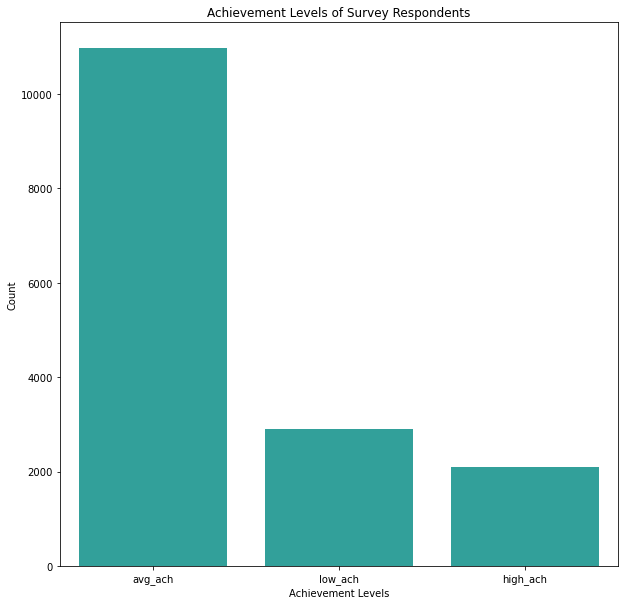

         ach_level  Count  Percent
avg_ach    avg_ach  10971    68.69
low_ach    low_ach   2897    18.14
high_ach  high_ach   2103    13.17
_________________________________________________________________


In [34]:
cat_vars = ['ach_level']
quant_vars = []

def explore_univariate(df, cat_vars, quant_vars):
    for var in cat_vars:
        _explore_univariate_categorical(df, var)
        print('_________________________________________________________________')
    for col in quant_vars:
        p, descriptive_stats = _explore_univariate_quant(df, col)
        plt.show(p)
        print(descriptive_stats)

def _explore_univariate_categorical(df, cat_var):
    '''
    takes in a dataframe and a categorical variable and returns
    a frequency table and barplot of the frequencies. 
    '''
    frequency_table = _freq_table(df, cat_var)
    plt.figure(figsize=(10,10))
    sns.barplot(x=cat_var, y='Count', data=frequency_table, color='lightseagreen')
    plt.title('Achievement Levels of Survey Respondents')
    plt.xlabel('Achievement Levels')
    plt.show()
    print(frequency_table)

    
def _freq_table(df, cat_var):
    '''
    for a given categorical variable, compute the frequency count and percent split
    and return a dataframe of those values along with the different classes. 
    '''
    class_labels = list(df[cat_var].unique())

    frequency_table = (
        pd.DataFrame({cat_var: class_labels,
                      'Count': df[cat_var].value_counts(normalize=False), 
                      'Percent': round(df[cat_var].value_counts(normalize=True)*100,2)}
                    )
    )
    return frequency_table

explore_univariate(df, cat_vars, quant_vars)


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15971 entries, 0 to 15971
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   fruit_veg    15971 non-null  int64   
 1   stress       15971 non-null  int64   
 2   core_circle  15971 non-null  int64   
 3   support      15971 non-null  int64   
 4   social       15971 non-null  int64   
 5   achievement  15971 non-null  int64   
 6   donation     15971 non-null  int64   
 7   bmi          15971 non-null  int64   
 8   steps        15971 non-null  int64   
 9   vision       15971 non-null  int64   
 10  sleep_hrs    15971 non-null  int64   
 11  shouts       15971 non-null  int64   
 12  awards       15971 non-null  int64   
 13  passion      15971 non-null  int64   
 14  meditation   15971 non-null  int64   
 15  age_range    15971 non-null  object  
 16  gender       15971 non-null  object  
 17  balance      15971 non-null  float64 
 18  ach_level    15971 non-nul

<a id='SD'></a>
#### ```Split Data```

In [36]:
#splitting data for exploration
train, validate, test = prepare.train_validate_test_split(df4, 'high_ach', seed=123)

train.shape, validate.shape, test.shape

((8943, 29), (3833, 29), (3195, 29))

In [37]:
train.columns

Index(['fruit_veg', 'stress', 'core_circle', 'support', 'social',
       'achievement', 'donation', 'bmi', 'steps', 'vision', 'sleep_hrs',
       'shouts', 'awards', 'passion', 'meditation', 'age_range', 'gender',
       'balance', 'ach_level', 'sleep_bins', 'low_ach', 'avg_ach', 'high_ach',
       'female', 'male', '21 to 35', '36 to 50', '51 or more', 'Less than 20'],
      dtype='object')

In [38]:
train.stress.value_counts()

3    2459
2    1904
4    1637
1    1410
5    1144
0     389
Name: stress, dtype: int64

In [39]:
train = pd.DataFrame(train)
validate = pd.DataFrame(validate)
test = pd.DataFrame(test)

<a id='EX'></a>
## ```Explore Data```
[back](#back) | [next](#HY)

In [40]:
# #sns.pairplot(train, hue = 'stress', edgecolor = 'darkblue', palette = 'Accent')

# sns.pairplot(data=train, corner=True, hue='ach_level', palette = 'Accent')

# plt.show()

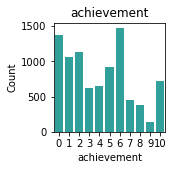

    achievement  Count  Percent
2             6   1471    16.45
3             0   1382    15.45
5             2   1133    12.67
4             1   1057    11.82
1             5    918    10.27
0            10    721     8.06
10            4    653     7.30
6             3    629     7.03
7             7    455     5.09
8             8    387     4.33
9             9    137     1.53
_________________________________________________________________


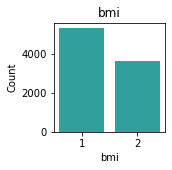

   bmi  Count  Percent
1    1   5317    59.45
2    2   3626    40.55
_________________________________________________________________


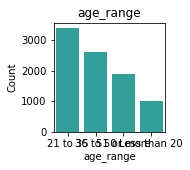

                 age_range  Count  Percent
21 to 35          21 to 35   3394    37.95
36 to 50          36 to 50   2623    29.33
51 or more      51 or more   1902    21.27
Less than 20  Less than 20   1024    11.45
_________________________________________________________________


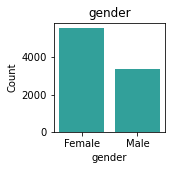

        gender  Count  Percent
Female  Female   5561    62.18
Male      Male   3382    37.82
_________________________________________________________________


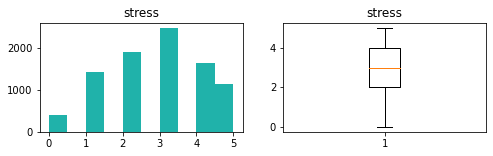

count    8943.000000
mean        2.780163
std         1.371736
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: stress, dtype: float64


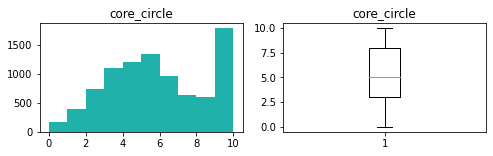

count    8943.000000
mean        5.528234
std         2.843346
min         0.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: core_circle, dtype: float64


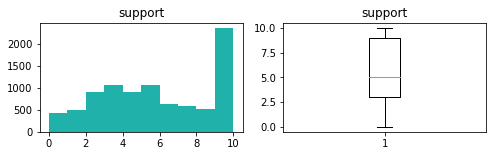

count    8943.000000
mean        5.578553
std         3.241122
min         0.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        10.000000
Name: support, dtype: float64


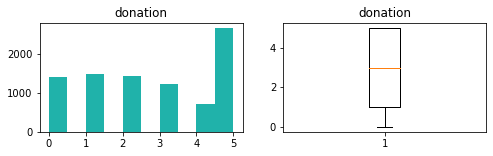

count    8943.00000
mean        2.70927
std         1.85248
min         0.00000
25%         1.00000
50%         3.00000
75%         5.00000
max         5.00000
Name: donation, dtype: float64


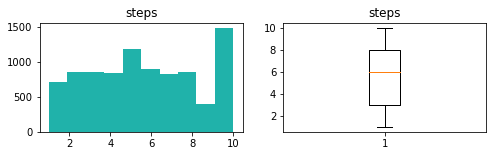

count    8943.000000
mean        5.689142
std         2.891032
min         1.000000
25%         3.000000
50%         6.000000
75%         8.000000
max        10.000000
Name: steps, dtype: float64


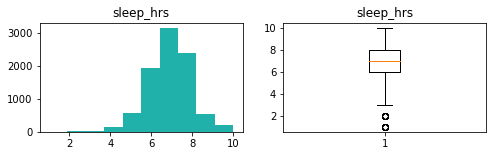

count    8943.000000
mean        7.046405
std         1.193893
min         1.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        10.000000
Name: sleep_hrs, dtype: float64


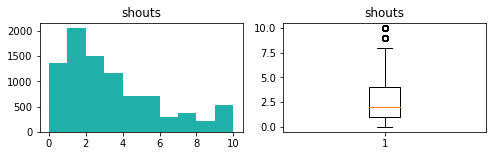

count    8943.000000
mean        2.942972
std         2.679998
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        10.000000
Name: shouts, dtype: float64


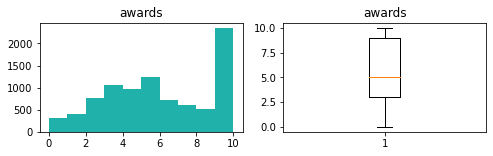

count    8943.000000
mean        5.734094
std         3.102976
min         0.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        10.000000
Name: awards, dtype: float64


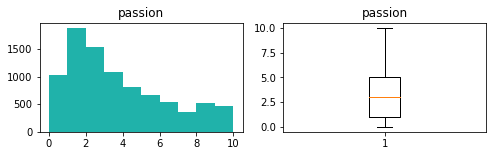

count    8943.000000
mean        3.298110
std         2.730643
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max        10.000000
Name: passion, dtype: float64


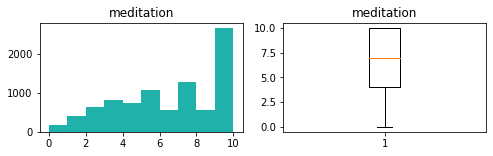

count    8943.000000
mean        6.257632
std         3.020070
min         0.000000
25%         4.000000
50%         7.000000
75%        10.000000
max        10.000000
Name: meditation, dtype: float64


In [41]:
cat_vars = [ 'achievement','bmi', 'age_range',  'gender']
quant_vars = ['stress', 'core_circle', 'support', 'donation', 
                    'steps', 'sleep_hrs', 'shouts', 'awards', 'passion', 'meditation' ]


explore.explore_univariate(train, cat_vars, quant_vars)



In [42]:
train.stress.describe()

count    8943.000000
mean        2.780163
std         1.371736
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: stress, dtype: float64

In [43]:
train.columns


Index(['fruit_veg', 'stress', 'core_circle', 'support', 'social',
       'achievement', 'donation', 'bmi', 'steps', 'vision', 'sleep_hrs',
       'shouts', 'awards', 'passion', 'meditation', 'age_range', 'gender',
       'balance', 'ach_level', 'sleep_bins', 'low_ach', 'avg_ach', 'high_ach',
       'female', 'male', '21 to 35', '36 to 50', '51 or more', 'Less than 20'],
      dtype='object')

In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8943 entries, 10725 to 10092
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   fruit_veg     8943 non-null   int64   
 1   stress        8943 non-null   int64   
 2   core_circle   8943 non-null   int64   
 3   support       8943 non-null   int64   
 4   social        8943 non-null   int64   
 5   achievement   8943 non-null   int64   
 6   donation      8943 non-null   int64   
 7   bmi           8943 non-null   int64   
 8   steps         8943 non-null   int64   
 9   vision        8943 non-null   int64   
 10  sleep_hrs     8943 non-null   int64   
 11  shouts        8943 non-null   int64   
 12  awards        8943 non-null   int64   
 13  passion       8943 non-null   int64   
 14  meditation    8943 non-null   int64   
 15  age_range     8943 non-null   object  
 16  gender        8943 non-null   object  
 17  balance       8943 non-null   float64 
 18  ach

In [45]:
train["low_ach"] = train['low_ach'].astype('int64')
train["avg_ach"] = train['avg_ach'].astype('int64')
train["high_ach"] = train['high_ach'].astype('int64')
train["female"] = train['female'].astype('int64')
train["male"] = train['male'].astype('int64')

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8943 entries, 10725 to 10092
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   fruit_veg     8943 non-null   int64   
 1   stress        8943 non-null   int64   
 2   core_circle   8943 non-null   int64   
 3   support       8943 non-null   int64   
 4   social        8943 non-null   int64   
 5   achievement   8943 non-null   int64   
 6   donation      8943 non-null   int64   
 7   bmi           8943 non-null   int64   
 8   steps         8943 non-null   int64   
 9   vision        8943 non-null   int64   
 10  sleep_hrs     8943 non-null   int64   
 11  shouts        8943 non-null   int64   
 12  awards        8943 non-null   int64   
 13  passion       8943 non-null   int64   
 14  meditation    8943 non-null   int64   
 15  age_range     8943 non-null   object  
 16  gender        8943 non-null   object  
 17  balance       8943 non-null   float64 
 18  ach

<AxesSubplot:xlabel='age_range', ylabel='Count'>

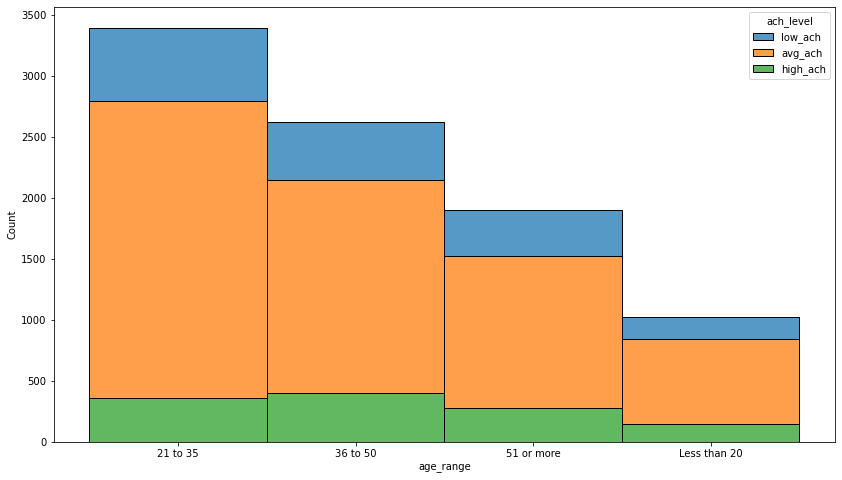

In [46]:
plt.figure(figsize=(14, 8))
hue_order = ['low_ach', 'avg_ach', 'high_ach']
sns.histplot(data=train, x="age_range", hue = "ach_level", multiple="stack")


In [47]:
train.columns

Index(['fruit_veg', 'stress', 'core_circle', 'support', 'social',
       'achievement', 'donation', 'bmi', 'steps', 'vision', 'sleep_hrs',
       'shouts', 'awards', 'passion', 'meditation', 'age_range', 'gender',
       'balance', 'ach_level', 'sleep_bins', 'low_ach', 'avg_ach', 'high_ach',
       'female', 'male', '21 to 35', '36 to 50', '51 or more', 'Less than 20'],
      dtype='object')

<AxesSubplot:xlabel='stress', ylabel='balance'>

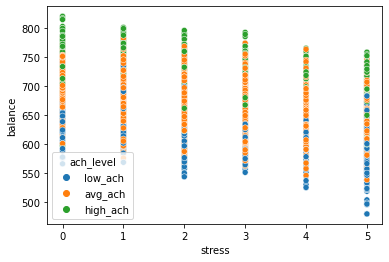

In [48]:
sns.scatterplot(x='stress', y='balance',
               data=train, hue='ach_level')

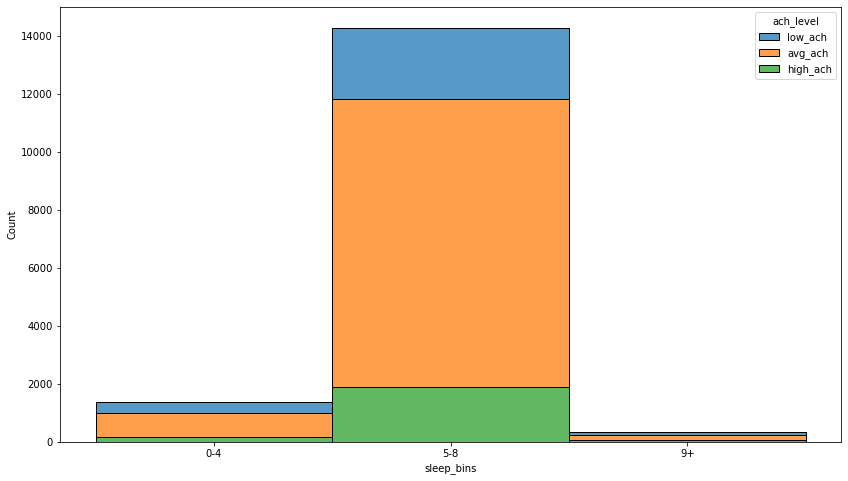

In [49]:
plt.figure(figsize=(14, 8))
hue_order = ['low_ach', 'avg_ach', 'high_ach']
sns.histplot(data=df, x="sleep_bins", hue = "ach_level", multiple="stack")

plt.show()

In [50]:
# plt.figure(figsize=(14, 8))
# sns.histplot(data=df, x="high_ach", hue = "sleep_bins", multiple="stack")

# plt.show()

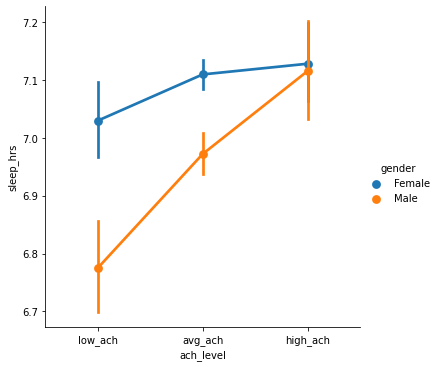

In [51]:
sns.factorplot(x = "ach_level", y = 'sleep_hrs', hue = "gender",data = df);
plt.show()

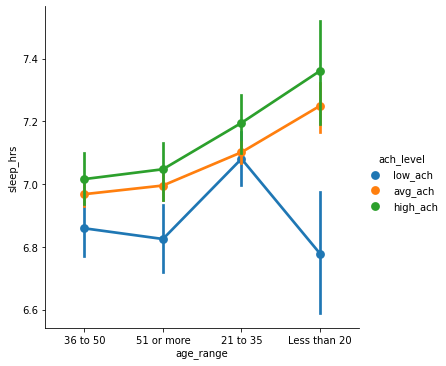

In [52]:
sns.factorplot(x = "age_range", y = 'sleep_hrs', hue = "ach_level",data = df);
plt.show()

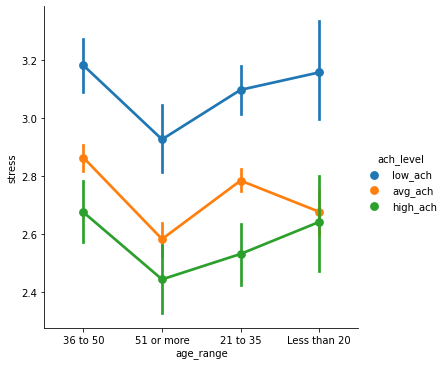

In [53]:
sns.factorplot(x = "age_range", y = 'stress', hue = "ach_level",data = df);
plt.show()

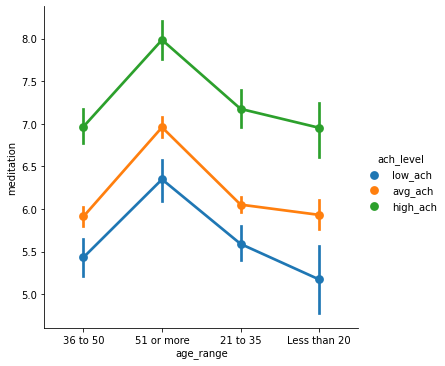

In [54]:
sns.factorplot(x = "age_range", y = 'meditation', hue = "ach_level",data = df);
plt.show()

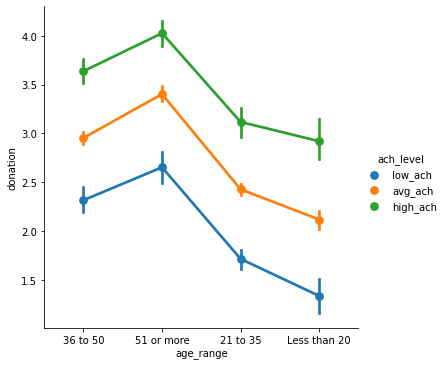

In [55]:
sns.factorplot(x = "age_range", y = 'donation', hue = "ach_level",data = df);
plt.show()

In [56]:
train.columns

Index(['fruit_veg', 'stress', 'core_circle', 'support', 'social',
       'achievement', 'donation', 'bmi', 'steps', 'vision', 'sleep_hrs',
       'shouts', 'awards', 'passion', 'meditation', 'age_range', 'gender',
       'balance', 'ach_level', 'sleep_bins', 'low_ach', 'avg_ach', 'high_ach',
       'female', 'male', '21 to 35', '36 to 50', '51 or more', 'Less than 20'],
      dtype='object')

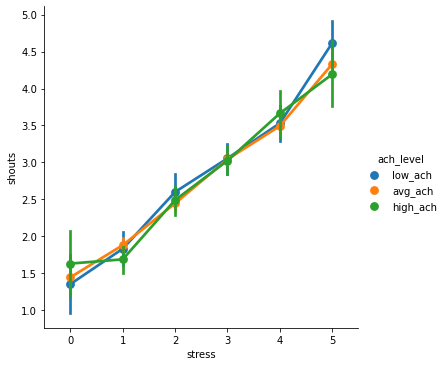

In [57]:
sns.factorplot(x = "stress", y = 'shouts', hue = "ach_level",data = df);
plt.show()

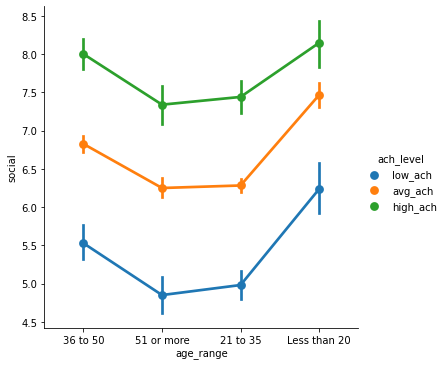

In [58]:
sns.factorplot(x = "age_range", y = 'social', hue = "ach_level",data = df);
plt.show()

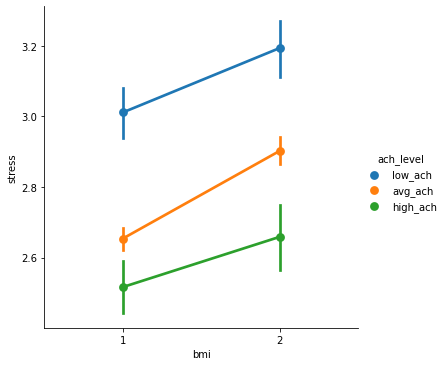

In [59]:
sns.factorplot(x = "bmi", y = 'stress', hue = "ach_level",data = df);
plt.show()

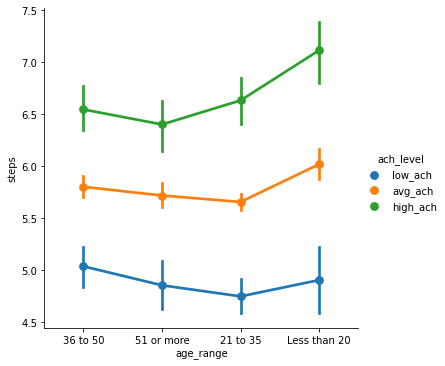

In [60]:
sns.factorplot(x = "age_range", y = 'steps', hue = "ach_level",data = df);
plt.show()

In [61]:
# sns.catplot(x="sleep_bins", y="stress", hue="ach_level", kind="swarm", data=train)

In [62]:
# sns.catplot(x="age_range", y="stress", hue="ach_level", kind="swarm", data=train)

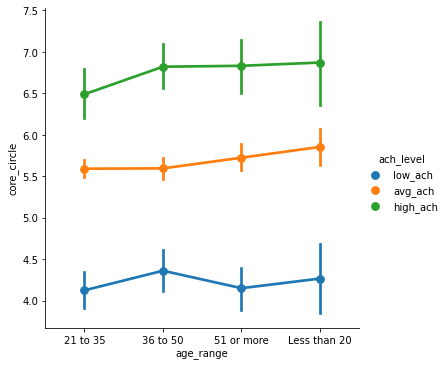

In [63]:
sns.factorplot(x = "age_range", y = 'core_circle', hue = "ach_level",data = train);
plt.show()

In [64]:

# target = [['high_ach']]
# continuous_target = [['high_ach']]
# cat_vars = [['female']]
# # train[['bmi', 'female', 'male']]
# quant_vars = [['stress', 'core_circle', 'support', 'social', 'donation',
#        'steps', 'sleep_hrs', 'shouts', 'awards', 'passion', 'meditation']]

# OLDexplore.explore_bivariate(train, target, cat_vars, quant_vars)


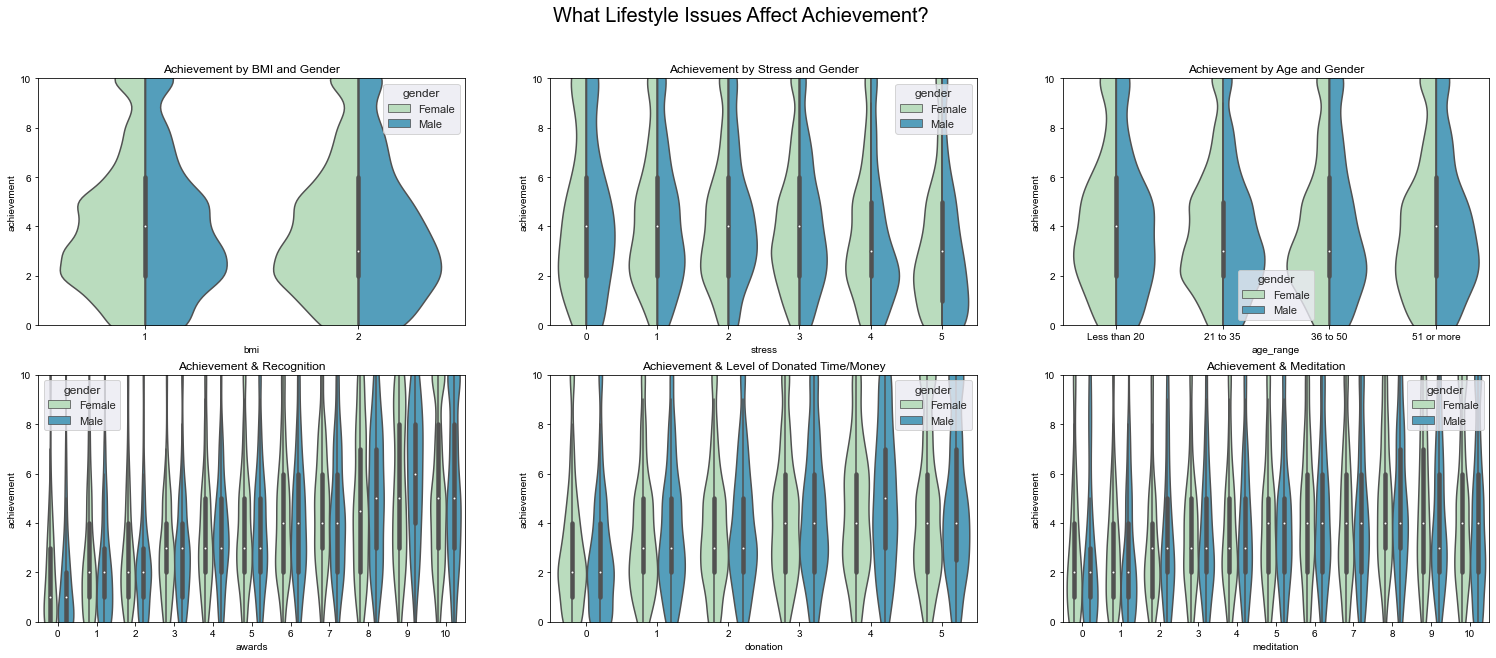

In [65]:



f,ax = plt.subplots(2,3,figsize=(26,10))
f.suptitle('What Lifestyle Issues Affect Achievement?', fontsize=20)
ax[0,0].set_title('Achievement by BMI and Gender')
ax[0,1].set_title('Achievement by Stress and Gender')
ax[0,2].set_title('Achievement by Age and Gender')
ax[1,0].set_title('Achievement & Recognition')
ax[1,1].set_title('Achievement & Level of Donated Time/Money')
ax[1,2].set_title('Achievement & Meditation')

ax[0,0].set_ylim([0, 10])
sns.set(style="darkgrid")
sns.violinplot(x= 'bmi',y='achievement', palette='GnBu', hue = 'gender', data=train, ax = ax[0,0], 
                split = True)

ax[0,1].set_ylim([0, 10])
sns.set(style="darkgrid")
sns.violinplot(x= 'stress',y='achievement', palette='GnBu', hue = 'gender', data=train, ax = ax[0,1], 
                 split = True)
ax[0,2].set_ylim([0, 10])
sns.violinplot(x = 'age_range', y = 'achievement', hue = 'gender', palette='GnBu', data = train,
               order=['Less than 20', '21 to 35', '36 to 50', '51 or more'], split = True, ax = ax[0,2])
ax[1,0].set_ylim([0, 10])
sns.violinplot(x = 'awards', y = 'achievement', hue = 'gender', palette='GnBu', data=train, ax = ax[1,0])
ax[1,1].set_ylim([0, 10])
sns.violinplot(x = 'donation', y = 'achievement',hue = 'gender',palette='GnBu', data=train, ax = ax[1,1])
ax[1,2].set_ylim([0, 10])
sns.violinplot(x = 'meditation', y = 'achievement', hue = 'gender', palette='GnBu', data=train, ax = ax[1,2])


plt.show()


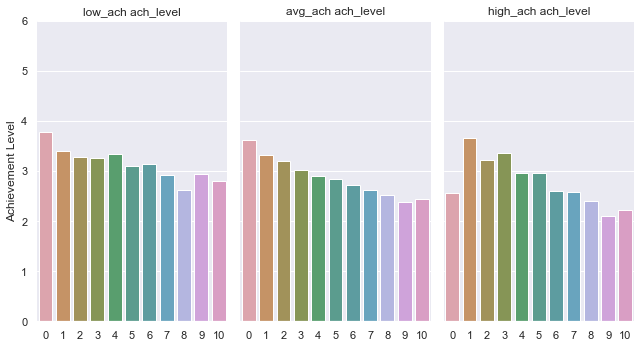

In [66]:
b = sns.catplot(x="meditation", y="stress", col="ach_level",
data=train, saturation=.5,kind="bar", ci=None, aspect=.6)
(b.set_axis_labels("", "Achievement Level")
.set_titles("{col_name} {col_var}")
.set(ylim=(0, 6))
.despine(left=True))  


In [67]:
# # ACHIEVEMENT LEVELS
# f,ax = plt.subplots(2,3,figsize=(16,12))
# ax[0,0].set_title('ACHIEVEMENT BY AGE GROUP')
# ax[0,1].set_title('ACHIEVEMENT BY GENDER')
# ax[0,2].set_title('ACHIEVEMENT BY AGE & GENDER')
# ax[1,0].set_title('ACHIEVEMENT & STRESS')
# ax[1,1].set_title('ACHIEVEMENT & WORK/LIFE BALANCE')
# ax[1,2].set_title('ACHIEVEMENT & SUFFICIENT INCOME:2=sufficient,1=not')

# ax[0,0].set_ylim([0, 10])
# df3.plot(x= 'age_range',y='achievement', kind='bar', color=('darksalmon', 'green'), alpha=0.7, ax = ax[0,0])


# sns.violinplot(x= 'gender',y='achievement', palette='coolwarm_r', data=df, ax = ax[0,1])
# sns.violinplot(x = 'age_range', y = 'achievement', hue = 'gender', palette='coolwarm_r', data = df,
#                order=['20 or less', '21 to 35', '36 to 50', '51 or more'], split = True, ax = ax[0,2])
# sns.pointplot(x = 'stress', y = 'achievement',  data=df, ax = ax[1,0])
# sns.pointplot(x = 'balance', y = 'achievement', data=df, ax = ax[1,1])
# sns.pointplot(x = 'passion', y = 'achievement',  data=df, ax = ax[1,2])

# f.suptitle('WHAT DRIVES OUR PERSONAL ACHIEVEMENT LEVELS?', fontsize=20)
# plt.show()


#### ```Hypotheses:```

H${0}$: There is no relationship between daily stress levels and personal achievement.<br>
H${a}$: There is a dependent relationship between daily stress levels and personal achievement.<br>

H${0}$: There is no relationship between bmi, age and levels of personal achievement. <br>
H${a}$: There is a dependnt relationship between bmi and levels of personal achievement. <br>


In [68]:
#sns.heatmap(train,cmap="YlGnBu", annot = True)

### Chi<sup>2</sup> Test : Sleep / Achievement

H<sub>0</sub>: There is no relationship between sleep and levels of personal achievement. <br>
H<sub>a</sub>: There is a dependent relationship between sleep and levels of personal achievement. <br>

In [69]:
# ctab == observed values

ctab = pd.crosstab(train.sleep_bins, train.ach_level)

#set alpha
confidence_level = .95
α = round(1 - confidence_level,2)
α

0.05

In [70]:
#expected == values we would expect to see if the variables are independent of each other.

chi2, p, degf, expected = stats.chi2_contingency(ctab)

print(f'chi2 value = {chi2}') 
print()
print(f'Confidence Level = {confidence_level} and alpha = {α}')
print()
print(f'p-value is {p}.')
print()
print(f'degrees of freedom = {degf}')
print()
if p<α:
    print('I reject the null hypothesis and move forward with the alternative hypothesis.')
    print('There appears to be a dependent relationship between sleep hours and achievement levels.')
else:
    print('I fail to reject the null hypothesis. We cannot assume there is relationship between sleep and achievement levels.')

chi2 value = 57.72183713685227

Confidence Level = 0.95 and alpha = 0.05

p-value is 8.729019953582671e-12.

degrees of freedom = 4

I reject the null hypothesis and move forward with the alternative hypothesis.
There appears to be a dependent relationship between sleep hours and achievement levels.


### Chi<sup>2</sup> Test : BMI / Achievement

H<sub>0</sub>: There is no relationship between bmi and levels of personal achievement. <br>
H<sub>a</sub>: There is a dependent relationship between bmi and levels of personal achievement. <br>

In [71]:
# ctab == observed values

ctab = pd.crosstab(train.bmi, train.ach_level)

#set alpha
confidence_level = .95
α = round(1 - confidence_level,2)
α

0.05

In [72]:
#expected == values we would expect to see if the variables are independent of each other.

chi2, p, degf, expected = stats.chi2_contingency(ctab)

print(f'chi2 value = {chi2}') 
print()
print(f'Confidence Level = {confidence_level} and alpha = {α}')
print()
print(f'p-value is {p}.')
print()
print(f'degrees of freedom = {degf}')
print()
if p<α:
    print('I reject the null hypothesis and move forward with the alternative hypothesis.')
    print('There appears to be a dependent relationship between BMI and achievement levels.')
else:
    print('I fail to reject the null hypothesis. We cannot assume there is relationship between BMI and achievement levels.')

chi2 value = 7.582172675515568

Confidence Level = 0.95 and alpha = 0.05

p-value is 0.022571068723715143.

degrees of freedom = 2

I reject the null hypothesis and move forward with the alternative hypothesis.
There appears to be a dependent relationship between BMI and achievement levels.


### Pearson's Correlation Test : Stress / Achievement

H<sub>0</sub>: There is no relationship between stress and levels of personal achievement. <br>
H<sub>a</sub>: There is a dependent relationship between stress and levels of personal achievement. <br>

In [73]:
# ctab == observed values

ctab = pd.crosstab(train.stress, train.ach_level)

#set alpha
confidence_level = .95
α = round(1 - confidence_level,2)
α

0.05

In [74]:
# Example of the Pearson's Correlation test
from scipy.stats import pearsonr
stat, p = pearsonr(train.stress, train.achievement)
print('stat=%.3f, p=%.3f' % (stat, p))

if p<α:
    print('I reject the null hypothesis.')
    print('There appears to be a dependent relationship between stress and achievement levels.')
else:
    print('I fail to reject the null hypothesis. We cannot assume there is no relationship between stress and achievement levels.')

stat=-0.118, p=0.000
I reject the null hypothesis.
There appears to be a dependent relationship between stress and achievement levels.


In [75]:
train.columns

Index(['fruit_veg', 'stress', 'core_circle', 'support', 'social',
       'achievement', 'donation', 'bmi', 'steps', 'vision', 'sleep_hrs',
       'shouts', 'awards', 'passion', 'meditation', 'age_range', 'gender',
       'balance', 'ach_level', 'sleep_bins', 'low_ach', 'avg_ach', 'high_ach',
       'female', 'male', '21 to 35', '36 to 50', '51 or more', 'Less than 20'],
      dtype='object')

In [76]:
train.sleep_hrs.value_counts()

7     3133
8     2399
6     1924
5      557
9      551
10     194
4      138
3       28
2       10
1        9
Name: sleep_hrs, dtype: int64

In [77]:
# I will drop any remaining categorical features I have left.

X_train = train.drop(columns=['gender', 'age_range', 'sleep_bins', 'balance','ach_level', 'high_ach', 'low_ach', 'avg_ach', 'female', 'male', '21 to 35', '36 to 50', '51 or more',
       'Less than 20','achievement'])
y_train = train[['ach_level']]

X_validate = validate.drop(columns=['gender', 'age_range', 'sleep_bins', 'balance','ach_level', 'high_ach', 'low_ach', 'avg_ach','female', 'male', '21 to 35', '36 to 50', '51 or more',
       'Less than 20','achievement'])
y_validate = validate[['ach_level']]

X_test = test.drop(columns=['gender', 'age_range', 'sleep_bins', 'balance','ach_level', 'high_ach', 'low_ach', 'avg_ach','female', 'male', '21 to 35', '36 to 50', '51 or more',
       'Less than 20','achievement'])
y_test = test[['ach_level']]

In [78]:
X_train

,fruit_veg,stress,core_circle,support,social,donation,bmi,steps,vision,sleep_hrs,shouts,awards,passion,meditation
10725,2,1,6,4,4,1,1,4,2,7,1,3,3,1
6319,3,3,2,1,10,2,2,3,0,6,0,1,0,7
8930,2,2,0,0,1,1,1,1,0,6,5,3,1,7
2671,5,3,4,5,8,1,2,5,0,7,5,6,1,1
13136,4,3,1,4,10,2,1,9,1,5,3,10,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11482,4,1,10,10,10,5,2,6,3,8,1,10,3,10
8709,5,4,6,10,10,5,1,2,1,7,3,10,2,9
172,3,3,8,4,1,4,2,2,2,9,4,7,1,6
14241,5,2,8,0,1,5,1,5,2,10,2,5,3,10


In [79]:
X_train.columns

Index(['fruit_veg', 'stress', 'core_circle', 'support', 'social', 'donation',
       'bmi', 'steps', 'vision', 'sleep_hrs', 'shouts', 'awards', 'passion',
       'meditation'],
      dtype='object')

In [80]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8943 entries, 10725 to 10092
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   fruit_veg    8943 non-null   int64
 1   stress       8943 non-null   int64
 2   core_circle  8943 non-null   int64
 3   support      8943 non-null   int64
 4   social       8943 non-null   int64
 5   donation     8943 non-null   int64
 6   bmi          8943 non-null   int64
 7   steps        8943 non-null   int64
 8   vision       8943 non-null   int64
 9   sleep_hrs    8943 non-null   int64
 10  shouts       8943 non-null   int64
 11  awards       8943 non-null   int64
 12  passion      8943 non-null   int64
 13  meditation   8943 non-null   int64
dtypes: int64(14)
memory usage: 1.3 MB


In [81]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8943 entries, 10725 to 10092
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   ach_level  8943 non-null   category
dtypes: category(1)
memory usage: 398.7 KB


## Modeling

### Establishing a Baseline Accuracy

In [82]:
df4.value_counts('ach_level')

ach_level
avg_ach     10971
low_ach      2897
high_ach     2103
dtype: int64

In [83]:
baseline = 'avg_ach'


In [84]:
baseline_accuracy = (y_train.ach_level == baseline).mean()
baseline_accuracy
print(f'Baseline accuracy is {baseline_accuracy}')

Baseline accuracy is 0.6851168511685117


_______________________________________________________________________________________________________________________

### Decision Tree Classifier

In [140]:
# Generate a blank, decision tree model
clf = DecisionTreeClassifier(random_state=123, max_depth = 3)

#Specify the features
n=['stress', 'vision', 'sleep_hrs',  'passion', 'meditation']

# model.fit(X, y)
clf = clf.fit(X_train[n], y_train)


In [141]:
import graphviz
from graphviz import Graph

n=['stress', 'vision', 'sleep_hrs',  'passion', 'meditation']

dot_data = export_graphviz(clf, feature_names=n , rounded=True, filled=True, out_file=None)
graph = graphviz.Source(dot_data) 

graph.render('wellbeing_decision_tree', view=True)

'wellbeing_decision_tree.pdf'

In [142]:
# Make predictions and estimate probability on train
y_pred = clf.predict(X_train[n])

In [143]:
y_pred_proba = clf.predict_proba(X_train[n])

In [144]:
print('Accuracy of Decision Tree classifier on in-sample training set: {:.4f}'
      .format(clf.score(X_train[n], y_train.ach_level)))


Accuracy of Decision Tree classifier on in-sample training set: 0.6945


In [145]:
print('Classification Report on Training Set')
print()
print(classification_report(y_train, y_pred))

Classification Report on Training Set

              precision    recall  f1-score   support

     avg_ach       0.70      0.96      0.81      6127
    high_ach       0.00      0.00      0.00      1177
     low_ach       0.56      0.22      0.31      1639

    accuracy                           0.69      8943
   macro avg       0.42      0.39      0.37      8943
weighted avg       0.59      0.69      0.61      8943



In [146]:
# Make predictions and estimate probability on validate
y_pred_val = clf.predict(X_validate[n])
y_pred_val_proba = clf.predict_proba(X_validate[n])

In [147]:
print('Accuracy of Decision Tree classifier on out-of-sample validation set: {:.2f}'
      .format(clf.score(X_validate[n], y_validate.ach_level)))

Accuracy of Decision Tree classifier on out-of-sample validation set: 0.70


In [148]:
print('Classification Report on Validate Set')
print()
print(classification_report(y_validate, y_pred_val))

Classification Report on Validate Set

              precision    recall  f1-score   support

     avg_ach       0.71      0.96      0.81      2640
    high_ach       0.00      0.00      0.00       505
     low_ach       0.54      0.19      0.28       688

    accuracy                           0.70      3833
   macro avg       0.41      0.38      0.37      3833
weighted avg       0.58      0.70      0.61      3833



#### Takeaways on Decision Tree Model 

- features modeled = stress, vision, hours of sleep, passion, meditation
- target = achievement level
- Accuracy of Decision classifier on training set: 69%
- Accuracy of Decision classifier on validation set: 70%
- Baseline Accuracy = 69%




_______________________________________________________________________________________________________________________

## Logistic Regression Model #1

In [149]:
# Create the logistic regression object
logit = LogisticRegression(random_state=123)

# specify the target and features 
features = ['stress', 'vision', 'sleep_hrs', 'passion', 'meditation']
target = ['ach_level']

# Fit a model using only these specified features
logit.fit(X_train[features], y_train)

# predict on that same subset of features that we fit on
y_pred_lr = logit.predict(X_train[features])

print(f'Baseline accuracy is {baseline_accuracy}')
print()
print('Accuracy of Logistic Regression classifier on training set: {:.4f}'
     .format(logit.score(X_train[features], y_train)))

Baseline accuracy is 0.6851168511685117

Accuracy of Logistic Regression classifier on training set: 0.6896


In [136]:
#classification report
print(classification_report(y_train, y_pred_lr))

              precision    recall  f1-score   support

     avg_ach       0.69      1.00      0.81      6127
    high_ach       0.70      0.05      0.09      1177
     low_ach       0.71      0.01      0.01      1639

    accuracy                           0.69      8943
   macro avg       0.70      0.35      0.31      8943
weighted avg       0.69      0.69      0.57      8943



In [151]:
# predict on that same subset of features that we fit on
y_pred_val_lr = logit.predict(X_validate[features])

print(f'Baseline accuracy is {baseline_accuracy}')
print()
print('Accuracy of Logistic Regression classifier on validation set: {:.4f}'
     .format(logit.score(X_validate[features], y_validate)))

Baseline accuracy is 0.6851168511685117

Accuracy of Logistic Regression classifier on validation set: 0.6888


In [152]:
#classification report
print(classification_report(y_validate, y_pred_val_lr))

              precision    recall  f1-score   support

     avg_ach       0.69      0.99      0.81      2640
    high_ach       0.43      0.03      0.06       505
     low_ach       0.71      0.01      0.01       688

    accuracy                           0.69      3833
   macro avg       0.61      0.34      0.30      3833
weighted avg       0.66      0.69      0.57      3833



#### Takeaways on LR Model 1

- features modeled = stress, vision, hours of sleep, passion, meditation
- target = achievement level
- Accuracy of Logistic Regression classifier on training set: 0.6896%
- Accuracy of Logistic Regression classifier on validation set: 0.6888%
- Baseline Accuracy = 0.685


_______________________________________________________________________________________________________________________

## Logistic Regression Model #2

In [153]:
# Create the logistic regression object
logit2 = LogisticRegression(random_state=123)

# specify the target and features 
features = ['vision','passion', 'stress', 'meditation']
target = ['ach_level']

# Fit a model using only these specified features
logit2.fit(X_train[features], y_train)

# predict on that same subset of features that we fit on
y_pred_lr2 = logit2.predict(X_train[features])

print(f'Baseline accuracy is {baseline_accuracy}')
print()
print('Accuracy of Logistic Regression Model #2 classifier on training set: {:.4f}'
     .format(logit2.score(X_train[features], y_train)))

Baseline accuracy is 0.6851168511685117

Accuracy of Logistic Regression Model #2 classifier on training set: 0.6889


In [154]:
#classification report
print(classification_report(y_train, y_pred_lr2))

              precision    recall  f1-score   support

     avg_ach       0.69      1.00      0.81      6127
    high_ach       0.70      0.05      0.09      1177
     low_ach       0.00      0.00      0.00      1639

    accuracy                           0.69      8943
   macro avg       0.46      0.35      0.30      8943
weighted avg       0.56      0.69      0.57      8943



In [155]:
# predict on that same subset of features that we fit on
y_pred_val_lr2 = logit2.predict(X_validate[features])

print(f'Baseline accuracy is {baseline_accuracy}')
print()
print('Accuracy of Logistic Regression Model #2 classifier on validation set: {:.4f}'
     .format(logit2.score(X_validate[features], y_validate)))

Baseline accuracy is 0.6851168511685117

Accuracy of Logistic Regression Model #2 classifier on validation set: 0.6880


In [156]:
#classification report
print(classification_report(y_validate, y_pred_val_lr2))

              precision    recall  f1-score   support

     avg_ach       0.69      0.99      0.81      2640
    high_ach       0.43      0.03      0.06       505
     low_ach       0.00      0.00      0.00       688

    accuracy                           0.69      3833
   macro avg       0.37      0.34      0.29      3833
weighted avg       0.53      0.69      0.57      3833



#### Takeaways on LR Model 2

- features modeled =  ['vision','passion', 'stress', 'meditation']
- target = achievement level
- Accuracy of Logistic Regression - Model 2 classifier on training set: 0.6889%
- Accuracy of Logistic Regression - Model 2 classifier on validation set: 0.6880%
- Baseline Accuracy = 0.685%


_______________________________________________________________________________________________________________________

## Logistic Regression Model #3

In [157]:
# Create the logistic regression object
logit3 = LogisticRegression(random_state=123)

# specify the target and features 
features = ['stress','shouts', 'sleep_hrs', 'bmi']
target = ['ach_level']

# Fit a model using only these specified features
logit3.fit(X_train[features], y_train)

# predict on that same subset of features that we fit on
y_pred_lr3 = logit3.predict(X_train[features])

print(f'Baseline accuracy is {baseline_accuracy}')
print()
print('Accuracy of Logistic Regression Model #3 classifier on training set: {:.4f}'
     .format(logit3.score(X_train[features], y_train)))

Baseline accuracy is 0.6851168511685117

Accuracy of Logistic Regression Model #3 classifier on training set: 0.6851


In [132]:
#classification report
print(classification_report(y_train, y_pred_lr2))

              precision    recall  f1-score   support

     avg_ach       0.69      1.00      0.81      6127
    high_ach       0.70      0.05      0.09      1177
     low_ach       0.00      0.00      0.00      1639

    accuracy                           0.69      8943
   macro avg       0.46      0.35      0.30      8943
weighted avg       0.56      0.69      0.57      8943



In [158]:
# predict on that same subset of features that we fit on
y_pred_val_lr3 = logit3.predict(X_validate[features])

print(f'Baseline accuracy is {baseline_accuracy}')
print()
print('Accuracy of Logistic Regression Model #3 classifier on out-of-sample validation set: {:.4f}'
     .format(logit3.score(X_validate[features], y_validate)))

Baseline accuracy is 0.6851168511685117

Accuracy of Logistic Regression Model #3 classifier on out-of-sample validation set: 0.6888


In [159]:
#classification report
print(classification_report(y_validate, y_pred_val_lr2))

              precision    recall  f1-score   support

     avg_ach       0.69      0.99      0.81      2640
    high_ach       0.43      0.03      0.06       505
     low_ach       0.00      0.00      0.00       688

    accuracy                           0.69      3833
   macro avg       0.37      0.34      0.29      3833
weighted avg       0.53      0.69      0.57      3833



#### Takeaways on LR Model 3

- features modeled =  ['stress','shouts', 'sleep_hrs', 'bmi']
- target = achievement level
- Accuracy of Logistic Regression - Model 3 classifier on training set: 0.685%
- Accuracy of Logistic Regression - Model 3 classifier on validation set: 0.688%
- Baseline Accuracy = 0.685%



_______________________________________________________________________________________________________________________

## K-Nearest Neighbor

In [160]:
#make the model
knn = KNeighborsClassifier()

#Specify the features
features = ['vision','passion', 'stress', 'meditation']

#fit the model
knn_fit = knn.fit(X_train[features], y_train)

# evaluating the model
y_pred = knn.predict(X_train[features])

# check model accuracy
accuracy = knn.score(X_train[features], y_train)
print(f'Model accuracy is {accuracy:.3}')

Model accuracy is 0.719


In [161]:
# Classification metrics report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

     avg_ach       0.74      0.92      0.82      6127
    high_ach       0.64      0.25      0.36      1177
     low_ach       0.58      0.31      0.40      1639

    accuracy                           0.72      8943
   macro avg       0.65      0.49      0.53      8943
weighted avg       0.70      0.72      0.68      8943



In [162]:
# evaluating the model on validate
y_pred_val = knn.predict(X_validate[features])

# check model accuracy on validate
accuracy = knn.score(X_validate[features], y_validate)
print(f'Model accuracy is {accuracy:.3}')

Model accuracy is 0.662


In [163]:
# Classification metrics report
print(classification_report(y_validate, y_pred_val))

              precision    recall  f1-score   support

     avg_ach       0.71      0.87      0.78      2640
    high_ach       0.32      0.12      0.18       505
     low_ach       0.42      0.24      0.31       688

    accuracy                           0.66      3833
   macro avg       0.48      0.41      0.42      3833
weighted avg       0.61      0.66      0.62      3833



#### Takeaways on KNN Model 1

- features modeled =  ['vision','passion', 'stress', 'meditation']
- target = achievement level
- Accuracy of K-Nearest Neighbor classifier on in-sample training set: 0.719%
- Accuracy of K-Nearest Neighbor classifier on out-of-sample validation set: 0.662%
- Baseline Accuracy = 0.685%


_______________________________________________________________________________________________________________________

## K-Nearest Neighbor - Model 2

In [169]:
#make the model
knn2 = KNeighborsClassifier()

#Specify the features
features = ['stress', 'vision', 'sleep_hrs', 'passion', 'meditation']

#fit the model
knn2_fit = knn2.fit(X_train[features], y_train)

# evaluating the model
y_pred = knn2.predict(X_train[features])

# check model accuracy
accuracy = knn2.score(X_train[features], y_train)
print(f'Model accuracy is {accuracy:.3}')

Model accuracy is 0.742


In [170]:
# Classification metrics report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

     avg_ach       0.75      0.93      0.83      6127
    high_ach       0.66      0.28      0.39      1177
     low_ach       0.69      0.35      0.47      1639

    accuracy                           0.74      8943
   macro avg       0.70      0.52      0.57      8943
weighted avg       0.73      0.74      0.71      8943



In [171]:
# evaluating the model
y_pred_val = knn2.predict(X_validate[features])

# check model accuracy
accuracy = knn2.score(X_validate[features], y_validate)
print(f'Model accuracy is {accuracy:.3}')

Model accuracy is 0.658


In [172]:
# Classification metrics report
print(classification_report(y_validate, y_pred_val))

              precision    recall  f1-score   support

     avg_ach       0.71      0.87      0.78      2640
    high_ach       0.33      0.14      0.20       505
     low_ach       0.41      0.23      0.29       688

    accuracy                           0.66      3833
   macro avg       0.48      0.41      0.42      3833
weighted avg       0.61      0.66      0.62      3833



#### Takeaways on KNN Model 2

- features modeled =  ['vision','passion', 'stress', 'meditation']
- target = achievement level
- Accuracy of K-Nearest Neighbor classifier on in-sample training set: 0.742%
- Accuracy of K-Nearest Neighbor classifier on out-of-sample validation set: 0.658%
- Baseline Accuracy = 0.685%

_______________________________________________________________________________________________________________________

## Random Forest - Model 1

In [179]:
# make the model
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=3, 
                            random_state=123)

# Specify Features
features = ['vision','passion', 'stress', 'meditation']

# Fit the model 
rf.fit(X_train[features], y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=3, random_state=123)

In [180]:
# Feature Importance
print(rf.feature_importances_)

[0.43046716 0.46459298 0.03438571 0.07055415]


In [183]:
# Make Predictions
y_pred = rf.predict(X_train[features])

# Estimate probability
y_pred_proba = rf.predict_proba(X_train[features])

In [185]:
print('Accuracy of random forest classifier on train set: {:.4f}'
     .format(rf.score(X_train[features], y_train)))


Accuracy of random forest classifier on train set: 0.6948


In [183]:
# Make Predictions
y_pred_val = rf.predict(X_validate[features])

# Estimate probability
y_pred_proba = rf.predict_proba(X_validate[features])

In [184]:
print('Accuracy of random forest classifier on validation set: {:.4f}'
     .format(rf.score(X_validate[features], y_validate)))


Accuracy of random forest classifier on validation set: 0.6968


#### Takeaways on Random Forest - Model 1

- features modeled =  ['vision','passion', 'stress', 'meditation']

** Feature Importance: (greatest to least):  Passion, vision, meditation, stress
- target = achievement level
- Accuracy of Random Forest on in-sample training set: 0.6948%
- Accuracy of Random Forest on out-of-sample validation set: 0.6968%
- Baseline Accuracy = 0.685%